In [163]:
import pandas as pd

file = '/Users/ishitarajpal/Downloads/Weather-Prediction-main 2/data/weather_data_all/open_weather_data2012.csv'

df1 = pd.read_csv(file)


In [164]:
file1 = '/Users/ishitarajpal/Downloads/Weather-Prediction-main 2/data/weather_data_all/solcast_data.csv'
df2 = pd.read_csv(file1)

In [165]:
df1 = df1[['dt_iso', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all']]
df2 = df2[['Ghi']]

In [166]:
df = pd.concat([df1, df2], axis=1)

In [167]:
df.head()


,dt_iso,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi
0,2012-01-01 01:00:00 +0000 UTC,6.97,1018,99,5.31,0.48,NaN,100,0.0
1,2012-01-01 02:00:00 +0000 UTC,7.30,1018,99,5.35,0.22,NaN,100,0.0
2,2012-01-01 03:00:00 +0000 UTC,7.60,1018,98,5.42,0.15,NaN,100,0.0
3,2012-01-01 04:00:00 +0000 UTC,7.85,1018,98,5.49,NaN,NaN,100,0.0
4,2012-01-01 05:00:00 +0000 UTC,8.01,1018,97,5.65,NaN,NaN,99,0.0


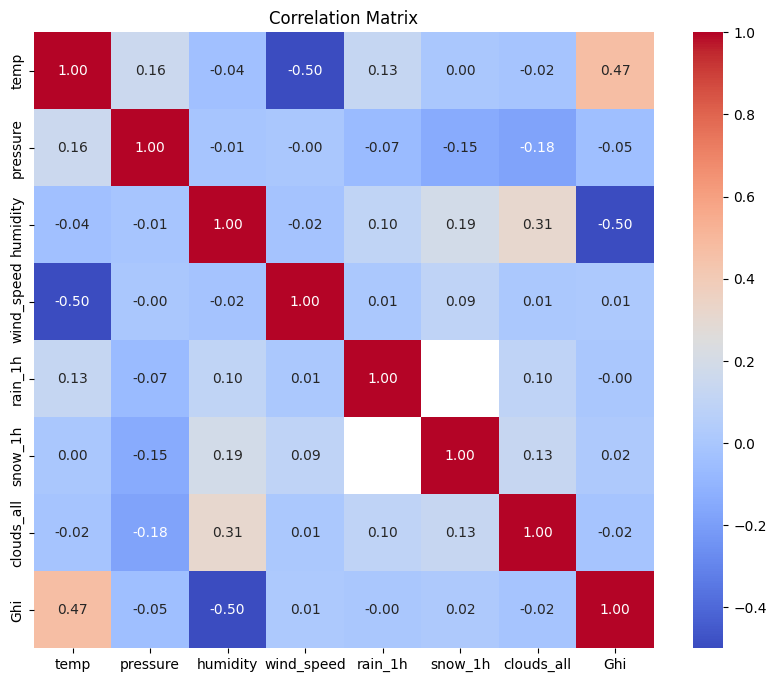

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'Ghi']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [169]:
df['rain_1h'] = df['rain_1h'].fillna(0)
df['snow_1h'] = df['snow_1h'].fillna(0)

nan_counts = df.isna().sum()

In [170]:
df['dt_iso'] = df['dt_iso'].str.replace(" +0000 UTC", "")
df['dt_iso'] = pd.to_datetime(df['dt_iso'])

In [171]:
df['year'] = df['dt_iso'].dt.year
df['month'] = df['dt_iso'].dt.month
df['day'] = df['dt_iso'].dt.day
df['hour'] = df['dt_iso'].dt.hour
df = df.drop(['dt_iso'], axis=1)

In [172]:
df.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,year,month,day,hour
0,6.97,1018,99,5.31,0.48,0.0,100,0.0,2012,1,1,1
1,7.30,1018,99,5.35,0.22,0.0,100,0.0,2012,1,1,2
2,7.60,1018,98,5.42,0.15,0.0,100,0.0,2012,1,1,3
3,7.85,1018,98,5.49,0.00,0.0,100,0.0,2012,1,1,4
4,8.01,1018,97,5.65,0.00,0.0,99,0.0,2012,1,1,5


In [173]:
historical_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Ghi']

df = df.copy()

new_df_list = [df]

for col in historical_columns:
    for i in range(1, 25):  
        new_col_name = f'{col}_{i}h'
        new_df = df[col].shift(i).to_frame(new_col_name)
        new_df_list.append(new_df)

df = pd.concat(new_df_list, axis=1)

df.fillna(method='bfill', inplace=True)

/var/folders/bx/q621rp091r788tk0lzsvbh3c0000gn/T/ipykernel_11968/2025948022.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [174]:
df.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,year,month,day,hour,temp_1h,temp_2h,temp_3h,temp_4h,temp_5h,temp_6h,temp_7h,temp_8h,temp_9h,temp_10h,temp_11h,temp_12h,temp_13h,temp_14h,temp_15h,temp_16h,temp_17h,temp_18h,temp_19h,temp_20h,temp_21h,temp_22h,temp_23h,temp_24h,rain_1h_1h,rain_1h_2h,rain_1h_3h,rain_1h_4h,rain_1h_5h,rain_1h_6h,rain_1h_7h,rain_1h_8h,rain_1h_9h,rain_1h_10h,rain_1h_11h,rain_1h_12h,rain_1h_13h,rain_1h_14h,rain_1h_15h,rain_1h_16h,rain_1h_17h,rain_1h_18h,rain_1h_19h,rain_1h_20h,rain_1h_21h,rain_1h_22h,rain_1h_23h,rain_1h_24h,snow_1h_1h,snow_1h_2h,snow_1h_3h,snow_1h_4h,snow_1h_5h,snow_1h_6h,snow_1h_7h,snow_1h_8h,snow_1h_9h,snow_1h_10h,snow_1h_11h,snow_1h_12h,snow_1h_13h,snow_1h_14h,snow_1h_15h,snow_1h_16h,snow_1h_17h,snow_1h_18h,snow_1h_19h,snow_1h_20h,snow_1h_21h,snow_1h_22h,snow_1h_23h,snow_1h_24h,clouds_all_1h,clouds_all_2h,clouds_all_3h,clouds_all_4h,clouds_all_5h,clouds_all_6h,clouds_all_7h,clouds_all_8h,clouds_all_9h,clouds_all_10h,clouds_all_11h,clouds_all_12h,clouds_all_13h,clouds_all_14h,clouds_all_15h,clouds_all_16h,clouds_all_17h,clouds_all_18h,clouds_all_19h,clouds_all_20h,clouds_all_21h,clouds_all_22h,clouds_all_23h,clouds_all_24h,Ghi_1h,Ghi_2h,Ghi_3h,Ghi_4h,Ghi_5h,Ghi_6h,Ghi_7h,Ghi_8h,Ghi_9h,Ghi_10h,Ghi_11h,Ghi_12h,Ghi_13h,Ghi_14h,Ghi_15h,Ghi_16h,Ghi_17h,Ghi_18h,Ghi_19h,Ghi_20h,Ghi_21h,Ghi_22h,Ghi_23h,Ghi_24h
0,6.97,1018,99,5.31,0.48,0.0,100,0.0,2012,1,1,1,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.30,1018,99,5.35,0.22,0.0,100,0.0,2012,1,1,2,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.60,1018,98,5.42,0.15,0.0,100,0.0,2012,1,1,3,7.30,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,0.22,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.85,1018,98,5.49,0.00,0.0,100,0.0,2012,1,1,4,7.60,7.30,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,0.15,0.22,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.01,1018,97,5.65,0.00,0.0,99,0.0,2012,1,1,5,7.85,7.60,7.30,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.

In [175]:
target_df_list = []

target_columns = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Ghi']


for col in target_columns:
    for i in range(1, 11):
        new_col_name = f'{col}_in_{i}h'
        new_df = df[col].shift(-i).to_frame(new_col_name)
        target_df_list.append(new_df)

df = pd.concat([df] + target_df_list, axis=1)

df = df[:-10]

In [176]:
df.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,year,month,day,hour,temp_1h,temp_2h,temp_3h,temp_4h,temp_5h,temp_6h,temp_7h,temp_8h,temp_9h,temp_10h,temp_11h,temp_12h,temp_13h,temp_14h,temp_15h,temp_16h,temp_17h,temp_18h,temp_19h,temp_20h,temp_21h,temp_22h,temp_23h,temp_24h,rain_1h_1h,rain_1h_2h,rain_1h_3h,rain_1h_4h,rain_1h_5h,rain_1h_6h,rain_1h_7h,rain_1h_8h,rain_1h_9h,rain_1h_10h,rain_1h_11h,rain_1h_12h,rain_1h_13h,rain_1h_14h,rain_1h_15h,rain_1h_16h,rain_1h_17h,rain_1h_18h,rain_1h_19h,rain_1h_20h,rain_1h_21h,rain_1h_22h,rain_1h_23h,rain_1h_24h,snow_1h_1h,snow_1h_2h,snow_1h_3h,snow_1h_4h,snow_1h_5h,snow_1h_6h,snow_1h_7h,snow_1h_8h,snow_1h_9h,snow_1h_10h,snow_1h_11h,snow_1h_12h,snow_1h_13h,snow_1h_14h,snow_1h_15h,snow_1h_16h,snow_1h_17h,snow_1h_18h,snow_1h_19h,snow_1h_20h,snow_1h_21h,snow_1h_22h,snow_1h_23h,snow_1h_24h,clouds_all_1h,clouds_all_2h,clouds_all_3h,clouds_all_4h,clouds_all_5h,clouds_all_6h,clouds_all_7h,clouds_all_8h,clouds_all_9h,clouds_all_10h,clouds_all_11h,clouds_all_12h,clouds_all_13h,clouds_all_14h,clouds_all_15h,clouds_all_16h,clouds_all_17h,clouds_all_18h,clouds_all_19h,clouds_all_20h,clouds_all_21h,clouds_all_22h,clouds_all_23h,clouds_all_24h,Ghi_1h,Ghi_2h,Ghi_3h,Ghi_4h,Ghi_5h,Ghi_6h,Ghi_7h,Ghi_8h,Ghi_9h,Ghi_10h,Ghi_11h,Ghi_12h,Ghi_13h,Ghi_14h,Ghi_15h,Ghi_16h,Ghi_17h,Ghi_18h,Ghi_19h,Ghi_20h,Ghi_21h,Ghi_22h,Ghi_23h,Ghi_24h,temp_in_1h,temp_in_2h,temp_in_3h,temp_in_4h,temp_in_5h,temp_in_6h,temp_in_7h,temp_in_8h,temp_in_9h,temp_in_10h,rain_1h_in_1h,rain_1h_in_2h,rain_1h_in_3h,rain_1h_in_4h,rain_1h_in_5h,rain_1h_in_6h,rain_1h_in_7h,rain_1h_in_8h,rain_1h_in_9h,rain_1h_in_10h,snow_1h_in_1h,snow_1h_in_2h,snow_1h_in_3h,snow_1h_in_4h,snow_1h_in_5h,snow_1h_in_6h,snow_1h_in_7h,snow_1h_in_8h,snow_1h_in_9h,snow_1h_in_10h,clouds_all_in_1h,clouds_all_in_2h,clouds_all_in_3h,clouds_all_in_4h,clouds_all_in_5h,clouds_all_in_6h,clouds_all_in_7h,clouds_all_in_8h,clouds_all_in_9h,clouds_all_in_10h,Ghi_in_1h,Ghi_in_2h,Ghi_in_3h,Ghi_in_4h,Ghi_in_5h,Ghi_in_6h,Ghi_in_7h,Ghi_in_8h,Ghi_in_9h,Ghi_in_10h
0,6.97,1018,99,5.31,0.48,0.0,100,0.0,2012,1,1,1,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.30,7.60,7.85,8.01,8.21,8.32,8.60,8.84,9.39,9.88,0.22,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,99.0,93.0,99.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,60.0,167.0,245.0
1,7.30,1018,99,5.35,0.22,0.0,100,0.0,2012,1,1,2,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.60,7.85,8.01,8.21,8.32,8.60,8.84,9.39,9.88,10.22,0.15,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,99.0,93.0,99.0,100.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,15.0,60.0,167.0,245.0,245.0
2,7.60,1018,98,5.42,0.15,0.0,100,0.0,2012,1,1,3,7.30,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,0.22,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0.48,0

In [177]:
df = df.iloc[24:]

In [178]:
import numpy as np

df1_copy = df.copy()

hour_sin = np.sin(2 * np.pi * df['hour'] / 24).to_frame('hour_sin')
hour_cos = np.cos(2 * np.pi * df['hour'] / 24).to_frame('hour_cos')

day_sin = np.sin(2 * np.pi * df['day'] / 31).to_frame('day_sin')
day_cos = np.cos(2 * np.pi * df['day'] / 31).to_frame('day_cos')

month_sin = np.sin(2 * np.pi * df['month'] / 12).to_frame('month_sin')
month_cos = np.cos(2 * np.pi * df['month'] / 12).to_frame('month_cos')


df1 = pd.concat([df1_copy, hour_sin, hour_cos, day_sin, day_cos, month_sin, month_cos], axis=1)


df1 = df1.drop(['hour', 'day', 'month'], axis=1)

In [179]:
df1.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,year,temp_1h,temp_2h,temp_3h,temp_4h,temp_5h,temp_6h,temp_7h,temp_8h,temp_9h,temp_10h,temp_11h,temp_12h,temp_13h,temp_14h,temp_15h,temp_16h,temp_17h,temp_18h,temp_19h,temp_20h,temp_21h,temp_22h,temp_23h,temp_24h,rain_1h_1h,rain_1h_2h,rain_1h_3h,rain_1h_4h,rain_1h_5h,rain_1h_6h,rain_1h_7h,rain_1h_8h,rain_1h_9h,rain_1h_10h,rain_1h_11h,rain_1h_12h,rain_1h_13h,rain_1h_14h,rain_1h_15h,rain_1h_16h,rain_1h_17h,rain_1h_18h,rain_1h_19h,rain_1h_20h,rain_1h_21h,rain_1h_22h,rain_1h_23h,rain_1h_24h,snow_1h_1h,snow_1h_2h,snow_1h_3h,snow_1h_4h,snow_1h_5h,snow_1h_6h,snow_1h_7h,snow_1h_8h,snow_1h_9h,snow_1h_10h,snow_1h_11h,snow_1h_12h,snow_1h_13h,snow_1h_14h,snow_1h_15h,snow_1h_16h,snow_1h_17h,snow_1h_18h,snow_1h_19h,snow_1h_20h,snow_1h_21h,snow_1h_22h,snow_1h_23h,snow_1h_24h,clouds_all_1h,clouds_all_2h,clouds_all_3h,clouds_all_4h,clouds_all_5h,clouds_all_6h,clouds_all_7h,clouds_all_8h,clouds_all_9h,clouds_all_10h,clouds_all_11h,clouds_all_12h,clouds_all_13h,clouds_all_14h,clouds_all_15h,clouds_all_16h,clouds_all_17h,clouds_all_18h,clouds_all_19h,clouds_all_20h,clouds_all_21h,clouds_all_22h,clouds_all_23h,clouds_all_24h,Ghi_1h,Ghi_2h,Ghi_3h,Ghi_4h,Ghi_5h,Ghi_6h,Ghi_7h,Ghi_8h,Ghi_9h,Ghi_10h,Ghi_11h,Ghi_12h,Ghi_13h,Ghi_14h,Ghi_15h,Ghi_16h,Ghi_17h,Ghi_18h,Ghi_19h,Ghi_20h,Ghi_21h,Ghi_22h,Ghi_23h,Ghi_24h,temp_in_1h,temp_in_2h,temp_in_3h,temp_in_4h,temp_in_5h,temp_in_6h,temp_in_7h,temp_in_8h,temp_in_9h,temp_in_10h,rain_1h_in_1h,rain_1h_in_2h,rain_1h_in_3h,rain_1h_in_4h,rain_1h_in_5h,rain_1h_in_6h,rain_1h_in_7h,rain_1h_in_8h,rain_1h_in_9h,rain_1h_in_10h,snow_1h_in_1h,snow_1h_in_2h,snow_1h_in_3h,snow_1h_in_4h,snow_1h_in_5h,snow_1h_in_6h,snow_1h_in_7h,snow_1h_in_8h,snow_1h_in_9h,snow_1h_in_10h,clouds_all_in_1h,clouds_all_in_2h,clouds_all_in_3h,clouds_all_in_4h,clouds_all_in_5h,clouds_all_in_6h,clouds_all_in_7h,clouds_all_in_8h,clouds_all_in_9h,clouds_all_in_10h,Ghi_in_1h,Ghi_in_2h,Ghi_in_3h,Ghi_in_4h,Ghi_in_5h,Ghi_in_6h,Ghi_in_7h,Ghi_in_8h,Ghi_in_9h,Ghi_in_10h,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
24,8.30,1014,90,3.86,0.0,0.0,99,0.0,2012,8.59,8.61,8.72,9.01,9.25,9.56,9.68,9.72,9.73,10.42,10.55,10.55,10.22,9.88,9.39,8.84,8.60,8.32,8.21,8.01,7.85,7.60,7.30,6.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.22,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,99.0,99.0,99.0,100.0,100.0,100.0,100.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,93.0,99.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,92.0,145.0,223.0,245.0,245.0,167.0,60.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,8.02,8.11,7.96,8.00,7.90,7.87,8.13,9.21,9.49,0.0,0.0,0.00,0.00,0.00,0.00,0.13,0.12,0.17,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,99.0,100.0,100.0,100.0,100.0,100.0,96.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,35.0,56.0,90.0,0.258819,0.965926,0.394356,0.918958,0.5,0.866025
25,8.00,1014,89,3.75,0.0,0.0,99,0.0,2012,8.30,8.59,8.61,8.72,9.01,9.25,9.56,9.68,9.72,9.73,10.42,10.55,10.55,10.22,9.88,9.39,8.84,8.60,8.32,8.21,8.01,7.85,7.60,7.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,100.0,100.0,99.0,99.0,99.0,100.0,100.0,100.0,100.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,93.0,99.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,92.0,145.0,223.0,245.0,245.0,167.0,60.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,8.02,8.11,7.96,8.00,7.90,7.87,8.13,9.21,9.49,9.65,0.0,0.0,0.00,0.00,0.00,0.13,0.12,0.17,0.47,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,100.0,100.0,100.0,100.0,100.0,96.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,10.0,35.0,56.0,90.0,95.0,0.500000,0.866025,0.394356,0.918958,0.5,0.866025
26,8.02,1013,87,3.76,0.0,0.0,99,0.0,2012,8.00,8.30,8.59,8.61,8.72,9.01,9.25,9.56,9.68,9.72,9.73,10.42,10.55,10.55,10.22,9.

In [180]:
train_size= int(len(df1) * 0.7)
test_size = int(len(df1) * 0.2)
val_size = len(df1) - train_size - test_size

train = df1[:train_size]
test = df1[train_size:train_size + test_size]
val = df1[train_size + test_size:]

In [181]:
df1.head()

,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,Ghi,year,temp_1h,temp_2h,temp_3h,temp_4h,temp_5h,temp_6h,temp_7h,temp_8h,temp_9h,temp_10h,temp_11h,temp_12h,temp_13h,temp_14h,temp_15h,temp_16h,temp_17h,temp_18h,temp_19h,temp_20h,temp_21h,temp_22h,temp_23h,temp_24h,rain_1h_1h,rain_1h_2h,rain_1h_3h,rain_1h_4h,rain_1h_5h,rain_1h_6h,rain_1h_7h,rain_1h_8h,rain_1h_9h,rain_1h_10h,rain_1h_11h,rain_1h_12h,rain_1h_13h,rain_1h_14h,rain_1h_15h,rain_1h_16h,rain_1h_17h,rain_1h_18h,rain_1h_19h,rain_1h_20h,rain_1h_21h,rain_1h_22h,rain_1h_23h,rain_1h_24h,snow_1h_1h,snow_1h_2h,snow_1h_3h,snow_1h_4h,snow_1h_5h,snow_1h_6h,snow_1h_7h,snow_1h_8h,snow_1h_9h,snow_1h_10h,snow_1h_11h,snow_1h_12h,snow_1h_13h,snow_1h_14h,snow_1h_15h,snow_1h_16h,snow_1h_17h,snow_1h_18h,snow_1h_19h,snow_1h_20h,snow_1h_21h,snow_1h_22h,snow_1h_23h,snow_1h_24h,clouds_all_1h,clouds_all_2h,clouds_all_3h,clouds_all_4h,clouds_all_5h,clouds_all_6h,clouds_all_7h,clouds_all_8h,clouds_all_9h,clouds_all_10h,clouds_all_11h,clouds_all_12h,clouds_all_13h,clouds_all_14h,clouds_all_15h,clouds_all_16h,clouds_all_17h,clouds_all_18h,clouds_all_19h,clouds_all_20h,clouds_all_21h,clouds_all_22h,clouds_all_23h,clouds_all_24h,Ghi_1h,Ghi_2h,Ghi_3h,Ghi_4h,Ghi_5h,Ghi_6h,Ghi_7h,Ghi_8h,Ghi_9h,Ghi_10h,Ghi_11h,Ghi_12h,Ghi_13h,Ghi_14h,Ghi_15h,Ghi_16h,Ghi_17h,Ghi_18h,Ghi_19h,Ghi_20h,Ghi_21h,Ghi_22h,Ghi_23h,Ghi_24h,temp_in_1h,temp_in_2h,temp_in_3h,temp_in_4h,temp_in_5h,temp_in_6h,temp_in_7h,temp_in_8h,temp_in_9h,temp_in_10h,rain_1h_in_1h,rain_1h_in_2h,rain_1h_in_3h,rain_1h_in_4h,rain_1h_in_5h,rain_1h_in_6h,rain_1h_in_7h,rain_1h_in_8h,rain_1h_in_9h,rain_1h_in_10h,snow_1h_in_1h,snow_1h_in_2h,snow_1h_in_3h,snow_1h_in_4h,snow_1h_in_5h,snow_1h_in_6h,snow_1h_in_7h,snow_1h_in_8h,snow_1h_in_9h,snow_1h_in_10h,clouds_all_in_1h,clouds_all_in_2h,clouds_all_in_3h,clouds_all_in_4h,clouds_all_in_5h,clouds_all_in_6h,clouds_all_in_7h,clouds_all_in_8h,clouds_all_in_9h,clouds_all_in_10h,Ghi_in_1h,Ghi_in_2h,Ghi_in_3h,Ghi_in_4h,Ghi_in_5h,Ghi_in_6h,Ghi_in_7h,Ghi_in_8h,Ghi_in_9h,Ghi_in_10h,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
24,8.30,1014,90,3.86,0.0,0.0,99,0.0,2012,8.59,8.61,8.72,9.01,9.25,9.56,9.68,9.72,9.73,10.42,10.55,10.55,10.22,9.88,9.39,8.84,8.60,8.32,8.21,8.01,7.85,7.60,7.30,6.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.22,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,99.0,99.0,99.0,100.0,100.0,100.0,100.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,93.0,99.0,100.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,92.0,145.0,223.0,245.0,245.0,167.0,60.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.00,8.02,8.11,7.96,8.00,7.90,7.87,8.13,9.21,9.49,0.0,0.0,0.00,0.00,0.00,0.00,0.13,0.12,0.17,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,99.0,100.0,100.0,100.0,100.0,100.0,96.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,35.0,56.0,90.0,0.258819,0.965926,0.394356,0.918958,0.5,0.866025
25,8.00,1014,89,3.75,0.0,0.0,99,0.0,2012,8.30,8.59,8.61,8.72,9.01,9.25,9.56,9.68,9.72,9.73,10.42,10.55,10.55,10.22,9.88,9.39,8.84,8.60,8.32,8.21,8.01,7.85,7.60,7.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.15,0.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,100.0,100.0,99.0,99.0,99.0,100.0,100.0,100.0,100.0,97.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,99.0,93.0,99.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,92.0,145.0,223.0,245.0,245.0,167.0,60.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,8.02,8.11,7.96,8.00,7.90,7.87,8.13,9.21,9.49,9.65,0.0,0.0,0.00,0.00,0.00,0.13,0.12,0.17,0.47,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,100.0,100.0,100.0,100.0,100.0,96.0,100.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,10.0,35.0,56.0,90.0,95.0,0.500000,0.866025,0.394356,0.918958,0.5,0.866025
26,8.02,1013,87,3.76,0.0,0.0,99,0.0,2012,8.00,8.30,8.59,8.61,8.72,9.01,9.25,9.56,9.68,9.72,9.73,10.42,10.55,10.55,10.22,9.

Linear Regression

In [182]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

base_target_variables = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'Ghi']
trained_models = {}
target_variables = [f'{base_target}_in_{i}h' for base_target in base_target_variables for i in range(1, 11)]
features = [col for col in train.columns if col not in target_variables]

class LinearRegressionPyTorch(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionPyTorch, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

def r_squared(y_true, y_pred):
    mean_y = torch.mean(y_true)
    ss_tot = torch.sum((y_true - mean_y) ** 2)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2.item()   

def mean_absolute_error(y_true, y_pred):
    mae = torch.mean(torch.abs(y_true - y_pred))
    return mae.item()

for target in target_variables:
    X_train = train[features].values
    y_train = train[target].values.reshape(-1, 1)
    X_test = test[features].values
    y_test = test[target].values.reshape(-1, 1)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)

    model = LinearRegressionPyTorch(X_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.035)  

    epochs = 100  
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    trained_models[target] = {"model": model, "scaler": scaler}

    model.eval()
    with torch.no_grad():
        y_pred_test_tensor = model(X_test_tensor)¯
        y_test_tensor = torch.FloatTensor(y_test)

        r2 = r_squared(y_test_tensor, y_pred_test_tensor)
        mae = mean_absolute_error(y_test_tensor, y_pred_test_tensor)
        mse_test = mean_squared_error(y_test, y_pred_test_tensor.numpy())
        rmse_test = np.sqrt(mse_test)

        # Print consolidated metrics
        print(f"Metrics for {target}:")
        print(f"  RMSE: {rmse_test:.4f}")
        print(f"  R-squared: {r2:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        print()


Metrics for temp_in_1h:
  RMSE: 1.2488
  R-squared: 0.9736
  Mean Absolute Error: 0.9566

Metrics for temp_in_2h:
  RMSE: 1.5776
  R-squared: 0.9578
  Mean Absolute Error: 1.2141

Metrics for temp_in_3h:
  RMSE: 1.8324
  R-squared: 0.9431
  Mean Absolute Error: 1.4143

Metrics for temp_in_4h:
  RMSE: 2.0317
  R-squared: 0.9301
  Mean Absolute Error: 1.5708

Metrics for temp_in_5h:
  RMSE: 2.1834
  R-squared: 0.9193
  Mean Absolute Error: 1.6889

Metrics for temp_in_6h:
  RMSE: 2.2952
  R-squared: 0.9108
  Mean Absolute Error: 1.7763

Metrics for temp_in_7h:
  RMSE: 2.3891
  R-squared: 0.9033
  Mean Absolute Error: 1.8477

Metrics for temp_in_8h:
  RMSE: 2.4609
  R-squared: 0.8974
  Mean Absolute Error: 1.9016

Metrics for temp_in_9h:
  RMSE: 2.5177
  R-squared: 0.8926
  Mean Absolute Error: 1.9436

Metrics for temp_in_10h:
  RMSE: 2.5709
  R-squared: 0.8881
  Mean Absolute Error: 1.9816

Metrics for rain_1h_in_1h:
  RMSE: 0.5936
  R-squared: 0.1045
  Mean Absolute Error: 0.1521

Metric

In [183]:
# read out weights / bias
for target, model_data in trained_models.items():
    model = model_data['model']
    print(f"Weights for {target}: {model.linear.weight.data}")
    print(f"Biases for {target}: {model.linear.bias.data}")

Weights for temp_in_1h: tensor([[ 2.1950e+00, -6.4693e-02, -4.7204e-01, -3.7397e-02, -8.2507e-02,
         -4.7068e-02,  2.4766e-03,  2.2787e-01,  3.3236e-02,  1.6599e+00,
          1.0859e+00,  7.8958e-01,  3.7204e-01,  2.6100e-01,  4.4040e-02,
          2.3256e-02, -9.4107e-02, -1.4301e-01, -1.3444e-01, -9.7319e-03,
          1.5124e-02,  4.6325e-02,  2.4923e-02,  1.0396e-02,  4.2289e-02,
          1.9154e-01,  1.5892e-01,  1.3752e-01,  3.2469e-01,  3.3151e-01,
          2.2756e-01,  1.6966e-01,  1.1503e-02, -1.3565e-02, -8.2720e-03,
         -4.1856e-03,  1.9803e-02, -1.1144e-02,  2.0894e-02, -4.3372e-03,
         -9.5155e-03,  1.0888e-02, -2.6314e-02, -6.2968e-04, -1.8409e-02,
         -1.8861e-02, -1.2440e-02, -1.6071e-02, -2.2318e-03, -7.4676e-03,
         -1.6045e-02, -1.1904e-02, -3.0981e-03, -2.0596e-02,  5.8898e-03,
          6.6223e-03,  1.9413e-02,  2.3036e-02,  1.7264e-03, -9.4642e-03,
          3.8556e-02, -1.1733e-02, -8.9809e-03,  2.7156e-02, -2.0541e-02,
         -6.85

Neural Network


In [190]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a Neural Network class
class NeuralNetworkPyTorch(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNetworkPyTorch, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)  # First hidden layer with 64 units
        self.fc2 = nn.Linear(64, 32)         # Second hidden layer with 32 units
        self.fc3 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.relu(self.fc2(x))  # Apply ReLU activation
        x = self.fc3(x)
        return x

def r_squared(y_true, y_pred):
    mean_y = torch.mean(y_true)
    ss_tot = torch.sum((y_true - mean_y) ** 2)
    ss_res = torch.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2.item()

def mean_absolute_error(y_true, y_pred):
    mae = torch.mean(torch.abs(y_true - y_pred))
    return mae.item()

trained_models = {}
for target in target_variables:
    X_train = train[features].values
    y_train = train[target].values.reshape(-1, 1)
    X_test = test[features].values
    y_test = test[target].values.reshape(-1, 1)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train)
    X_test_tensor = torch.FloatTensor(X_test)

    model = NeuralNetworkPyTorch(X_train.shape[1])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Use Adam optimizer

    epochs = 100
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

    trained_models[target] = {"model": model, "scaler": scaler}

    model.eval()
    with torch.no_grad():
        y_pred_test_tensor = model(X_test_tensor)
        y_test_tensor = torch.FloatTensor(y_test)

        r2 = r_squared(y_test_tensor, y_pred_test_tensor)
        mae = mean_absolute_error(y_test_tensor, y_pred_test_tensor)
        mse_test = mean_squared_error(y_test, y_pred_test_tensor.numpy())
        rmse_test = np.sqrt(mse_test)

        # Print consolidated metrics
        print(f"Neural Network Metrics for {target}:")
        print(f"  RMSE: {rmse_test:.4f}")
        print(f"  R-squared: {r2:.4f}")
        print(f"  Mean Absolute Error: {mae:.4f}")
        print()


Neural Network Metrics for temp_in_1h:
  RMSE: 2.8602
  R-squared: 0.8614
  Mean Absolute Error: 2.1960

Neural Network Metrics for temp_in_2h:
  RMSE: 3.0742
  R-squared: 0.8399
  Mean Absolute Error: 2.3890

Neural Network Metrics for temp_in_3h:
  RMSE: 3.0219
  R-squared: 0.8453
  Mean Absolute Error: 2.3257

Neural Network Metrics for temp_in_4h:
  RMSE: 3.1707
  R-squared: 0.8297
  Mean Absolute Error: 2.4323

Neural Network Metrics for temp_in_5h:
  RMSE: 3.3022
  R-squared: 0.8153
  Mean Absolute Error: 2.5574

Neural Network Metrics for temp_in_6h:
  RMSE: 3.4259
  R-squared: 0.8012
  Mean Absolute Error: 2.6585

Neural Network Metrics for temp_in_7h:
  RMSE: 3.4141
  R-squared: 0.8026
  Mean Absolute Error: 2.6243

Neural Network Metrics for temp_in_8h:
  RMSE: 3.3799
  R-squared: 0.8065
  Mean Absolute Error: 2.5913

Neural Network Metrics for temp_in_9h:
  RMSE: 3.5012
  R-squared: 0.7924
  Mean Absolute Error: 2.6993

Neural Network Metrics for temp_in_10h:
  RMSE: 3.5290


XG Boost

In [194]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

trained_models = {}
for target in target_variables:
    X_train = train[features].values
    y_train = train[target].values
    X_test = test[features].values
    y_test = test[target].values

    # Data scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Define and train the XGBoost model
    model = XGBRegressor(n_estimators=50, max_depth=10, learning_rate=0.1, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)

    trained_models[target] = {"model": model, "scaler": scaler}

    # Make predictions
    y_pred_test = model.predict(X_test)

    # Calculate metrics
    r2 = r_squared(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    # Print consolidated metrics
    print(f"XGBoost Metrics for {target}:")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print(f"  Mean Absolute Error: {mae:.4f}")
    print()


XGBoost Metrics for temp_in_1h:
  RMSE: 0.6016
  R-squared: 0.9939
  Mean Absolute Error: 0.4178

XGBoost Metrics for temp_in_2h:
  RMSE: 0.8993
  R-squared: 0.9863
  Mean Absolute Error: 0.6436

XGBoost Metrics for temp_in_3h:
  RMSE: 1.1493
  R-squared: 0.9776
  Mean Absolute Error: 0.8341

XGBoost Metrics for temp_in_4h:
  RMSE: 1.3715
  R-squared: 0.9681
  Mean Absolute Error: 1.0054

XGBoost Metrics for temp_in_5h:
  RMSE: 1.5624
  R-squared: 0.9587
  Mean Absolute Error: 1.1479

XGBoost Metrics for temp_in_6h:
  RMSE: 1.7290
  R-squared: 0.9494
  Mean Absolute Error: 1.2813

XGBoost Metrics for temp_in_7h:
  RMSE: 1.8780
  R-squared: 0.9403
  Mean Absolute Error: 1.4001

XGBoost Metrics for temp_in_8h:
  RMSE: 1.9885
  R-squared: 0.9330
  Mean Absolute Error: 1.4950

XGBoost Metrics for temp_in_9h:
  RMSE: 2.0992
  R-squared: 0.9254
  Mean Absolute Error: 1.5815

XGBoost Metrics for temp_in_10h:
  RMSE: 2.1850
  R-squared: 0.9191
  Mean Absolute Error: 1.6556

XGBoost Metrics for

Random Forest

In [195]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

def r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_tot = np.sum((y_true - mean_y) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

def mean_absolute_error(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

trained_models = {}
for target in target_variables:
    X_train = train[features].values
    y_train = train[target].values
    X_test = test[features].values
    y_test = test[target].values

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = RandomForestRegressor(n_estimators=10, bootstrap=True, max_samples=0.8, random_state=42)

    model.fit(X_train, y_train)

    trained_models[target] = {"model": model, "scaler": scaler}

    y_pred_test = model.predict(X_test)

    r2 = r_squared(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    # Print consolidated metrics
    print(f"Random Forest Metrics for {target}:")
    print(f"  RMSE: {rmse_test:.4f}")
    print(f"  R-squared: {r2:.4f}")
    print(f"  Mean Absolute Error: {mae:.4f}")
    print()


Random Forest Metrics for temp_in_1h:
  RMSE: 0.6488
  R-squared: 0.9929
  Mean Absolute Error: 0.4597

Random Forest Metrics for temp_in_2h:
  RMSE: 0.9802
  R-squared: 0.9837
  Mean Absolute Error: 0.7052

Random Forest Metrics for temp_in_3h:
  RMSE: 1.2505
  R-squared: 0.9735
  Mean Absolute Error: 0.9102

Random Forest Metrics for temp_in_4h:
  RMSE: 1.5027
  R-squared: 0.9618
  Mean Absolute Error: 1.1019

Random Forest Metrics for temp_in_5h:
  RMSE: 1.7094
  R-squared: 0.9505
  Mean Absolute Error: 1.2631

Random Forest Metrics for temp_in_6h:
  RMSE: 1.8838
  R-squared: 0.9399
  Mean Absolute Error: 1.4007

Random Forest Metrics for temp_in_7h:
  RMSE: 2.0389
  R-squared: 0.9296
  Mean Absolute Error: 1.5305

Random Forest Metrics for temp_in_8h:
  RMSE: 2.1559
  R-squared: 0.9213
  Mean Absolute Error: 1.6178

Random Forest Metrics for temp_in_9h:
  RMSE: 2.2732
  R-squared: 0.9125
  Mean Absolute Error: 1.7151

Random Forest Metrics for temp_in_10h:
  RMSE: 2.3460
  R-square